In [1]:
import networkx as nx
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
p = '401110'
y = '2012'

In [3]:
G = nx.DiGraph()
 
with open(p + '_' + y + '.csv', 'r') as csvfile:

    csv_f = csv.reader(csvfile)
    csv_f.next()

    for row in csv_f:
        G.add_edge(row[0],row[1],weight=row[2]) 

In [13]:
oc = nx.eigenvector_centrality_numpy(G, weight='weight')
nx.set_node_attributes(G, 'cent', oc)
node_color = [float(G.node[v]['cent']) for v in G]

totexp = {}
for exp in G.nodes(): 
    tx=sum([float(g) for exp,f,g in G.out_edges_iter(exp, 'weight')])
    totexp[exp] = tx
    avgexp = np.mean(tx) * 400
nx.set_node_attributes(G, 'totexp', totexp)
node_size = [float(G.node[v]['totexp']) / avgexp for v in G]

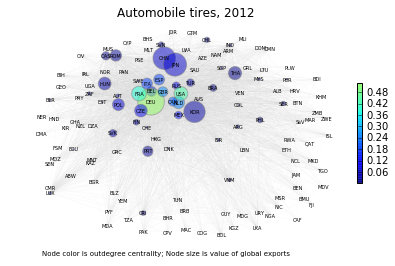

In [14]:
pos = nx.spring_layout(G,k=60,iterations=10) 
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, node_color=node_color, \
                               alpha=0.5) 
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', \
                               arrows=False, width=0.05,)
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')
plt.text(0,-0.1, \
         'Node color is eigenvector centrality; Node size is value of global exports', \
         fontsize=7)
plt.title('Automobile tires, ' + y, fontsize=12)
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)
plt.margins(0,0)
plt.axis('off')
plt.savefig(p + '.png', dpi=1000)

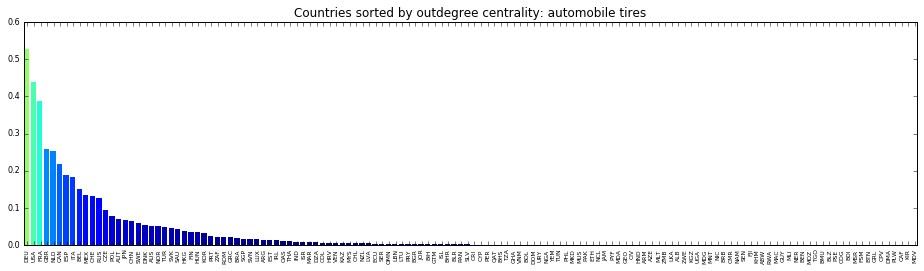

In [15]:
# Plot: centrality
plt.figure(figsize=(16, 4))
plt.title('Countries sorted by eigenvector centrality: automobile tires', fontsize=12)

heights = sorted(oc.values(), reverse=True)
country_list = sorted(oc, key=oc.__getitem__, reverse=True)

h = plt.bar(xrange(len(country_list)), heights, color=cm.jet(heights), align='center', edgecolor = "none")
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, country_list, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)
plt.savefig(p + '_cent.png', dpi=1000)